In [5]:
from keras.applications.inception_v3 import InceptionV3
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Concatenate, Activation, BatchNormalization, Flatten
from keras.layers import Input, Conv2D, MaxPooling2D, Input, AveragePooling2D, Dense
from keras.models import Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
import time
import matplotlib.pyplot as plt

In [6]:
#set wifth and heigt of the input
w = 32
h = 32
#set the number of epochs
epochs = 10

#open log file to dump progress data
f = open('log_flickr_resnet_32x32.txt','w')

In [7]:
def add_inception(input):
    B1 = Conv2D(128,(1,1), padding='same')(L1)
    B1 = Activation('relu')(B1)
    B2 = Conv2D(16,(1,1), padding='same')(L1)
    B2 = Activation('relu')(B2)
    B2 = Conv2D(32,(3,3), padding='same')(L1)
    B2 = Activation('relu')(B2)
    B3 = Conv2D(96,(1,1), padding='same')(L1)
    B3 = Activation('relu')(B2)
    B3 = Conv2D(128,(3,3), padding='same')(L1)
    B3 = Activation('relu')(B2)
    #B4 = Conv2D(64,(1,1), padding='same')(L1)
    #B4 = Activation('relu')(B4)
    L2 = layers.concatenate([B1, B2, B3], axis=3)
    return L2

In [8]:
main_input = Input(shape=(32,32,3))
L1 = Conv2D(32, (3, 3), padding='same')(main_input)
L1 = BatchNormalization()(L1)
L1 = Activation('relu')(L1)
L1 = Conv2D(32, (3, 3), padding='same')(main_input)
L1 = BatchNormalization()(L1)
L1 = Activation('relu')(L1)
L1 = MaxPooling2D(pool_size=(2,2))(L1)

#B1 = MaxPooling2D(pool_size=(2,2))(L1)
# Inception Module
L1 = add_inception(L1)
L1 = add_inception(L1)
L1 = add_inception(L1)
L1 = add_inception(L1)
L1 = add_inception(L1)
L1 = add_inception(L1)

L2 = AveragePooling2D(pool_size=(2,2))(L1)
L2 = Flatten()(L2)
L2 = Dense(256)(L2)
L2 = Dense(10,activation='softmax')(L2)

In [9]:
model = Model(main_input, L2)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 32)   128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 32, 32, 32)   0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
max_poolin

In [10]:
base_path = '/floyd/input/flickrdataset'
train_dir = base_path+'/train/'
validation_dir = base_path+'/validation/'
test_dir = base_path+'/test/'

In [11]:
#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)             
test_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), 
        batch_size=20, 
        class_mode='categorical')                                   

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [12]:
sgd = optimizers.SGD(lr=0.001, decay=5e-4, momentum=0.9, nesterov=True)
#model.compile(optimizer=optimizers.SGD(lr=1e-4),
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 5s 53ms/step - loss: 2.1475 - acc: 0.2100 - val_loss: 1.9944 - val_acc: 0.3300
Epoch 2/10
100/100 [==============================] - 4s 37ms/step - loss: 1.7090 - acc: 0.4065 - val_loss: 1.9773 - val_acc: 0.3500
Epoch 3/10
100/100 [==============================] - 4s 37ms/step - loss: 1.4461 - acc: 0.5070 - val_loss: 1.7846 - val_acc: 0.4450
Epoch 4/10
100/100 [==============================] - 4s 36ms/step - loss: 1.3333 - acc: 0.5295 - val_loss: 1.7733 - val_acc: 0.4200
Epoch 5/10
100/100 [==============================] - 4s 37ms/step - loss: 1.2130 - acc: 0.5825 - val_loss: 2.0999 - val_acc: 0.4150
Epoch 6/10
100/100 [==============================] - 4s 37ms/step - loss: 1.1083 - acc: 0.6305 - val_loss: 1.9717 - val_acc: 0.4400
Epoch 7/10
100/100 [==============================] - 4s 37ms/step - loss: 0.9980 - acc: 0.6710 - val_loss: 2.2042 - val_acc: 0.4050
Epoch 8/10
100/100 [==============================] - 4s 37ms/step - 

[0.21000000197440385, 0.40650000140070913, 0.5070000004768371, 0.5294999989867211, 0.5825000020861626, 0.6305000001192093, 0.6709999990463257, 0.6999999985098839, 0.7415000027418137, 0.7690000027418137]


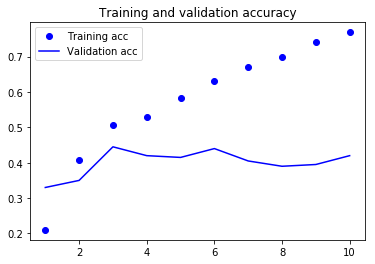

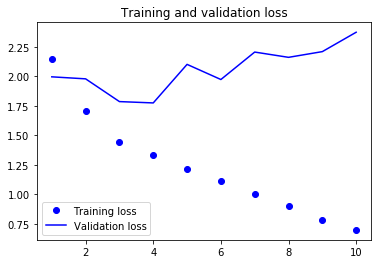

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print(acc)
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator)

Found 200 images belonging to 10 classes.


In [15]:
print(test_loss, test_acc)

2.413964641094208 0.45000000298023224
